<a href="https://colab.research.google.com/github/Gurneet-Singh/Python-Programs/blob/main/Copy_of_DS12_Project_1_Master_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<img src="https://static.junilearning.com/images/juni_logo.png" height=75 align=center hspace="5px"> **DS12 Project 1: Master Project**

Create your own EDA from scratch! Start by picking a research topic that interests you, and then formulate a few specific research questions that you would like to answer. Pick an appropriate dataset. Then, using a combination of statistics and at least three plots, answer your questions! Make sure to write out your findings in a clear and concise way. <br><br>

**Resources for datasets:**

Downloadable Files: 
* Kaggle: https://www.kaggle.com/datasets
* FiveThirtyEight: https://data.fivethirtyeight.com/
* BuzzFeedNews: https://github.com/BuzzFeedNews
* Data.gov: https://www.data.gov/
* NASA Earth Science: https://earthdata.nasa.gov/
* NASA Space: https://pds.nasa.gov/datasearch/data-search/

Public Web APIs: 
* Curated List: https://github.com/public-apis/public-apis
* Searchable Directory: https://www.programmableweb.com/apis/directory<br>

Or use anything else you can find online!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("training_data.csv")
display(df)

,Month #,White Player #,Black Player #,Score
0,1,73,1246,0.5
1,1,73,5097,0.5
2,1,73,5104,0.5
3,1,73,7321,1.0
4,1,73,7375,0.5
...,...,...,...,...
65048,100,8617,1536,0.5
65049,100,8621,102,0.0
65050,100,8621,5463,1.0
65051,100,8621,5814,0.5


the white and black player columns are their ID. if the score is 0, black won. if the score is 0.5, it's a draw. if the score is 1, white won.

we could make a new df that shows white wins, black losses, WLR (win loss ratio), total games played, white losses, black losses

In [2]:
wcount = pd.DataFrame(df["White Player #"].value_counts())
display(wcount)

,White Player #
1594,152
4850,147
1286,143
4037,132
391,131
...,...
2658,1
1820,1
2340,1
7111,1


In [3]:
bcount = pd.DataFrame(df["Black Player #"].value_counts())
display(bcount)

,Black Player #
4037,140
1512,135
4850,133
1286,127
64,127
...,...
781,1
2394,1
7303,1
6175,1


In [4]:
test = pd.concat([wcount, bcount], axis=1).sum(axis=1)
display(test)

1       52.0
2        1.0
3        8.0
4       46.0
5       13.0
        ... 
8627     8.0
8628     1.0
8629    63.0
8630     6.0
8631    11.0
Length: 7301, dtype: float64

In [5]:
finisheddf = pd.DataFrame()
finisheddf["# of Games"] = test
display(finisheddf)

,# of Games
1,52.0
2,1.0
3,8.0
4,46.0
5,13.0
...,...
8627,8.0
8628,1.0
8629,63.0
8630,6.0


In [6]:
binfo = df[["Black Player #", "Score"]].value_counts()
binfo = pd.DataFrame(binfo)
winfo = df[["White Player #", "Score"]].value_counts()
winfo = pd.DataFrame(winfo)
#binfo.loc[ID, type of ending]
display(binfo)

,,0
Black Player #,Score,
64,0.5,91
391,0.5,86
4850,0.5,80
4194,0.5,79
4171,0.5,75
...,...,...
619,0.5,1
2784,0.5,1
6461,0.5,1


In [7]:
playerindexb = set()
for i,_ in binfo.index:
  playerindexb.add(i)

bwins = {}
for i in playerindexb:
  try:
    bwins[i] = (binfo.loc[i, 0.0])
  except:
    bwins[i] = (0, 0)
blosses = {}
for i in playerindexb:
  try:
    blosses[i] = (binfo.loc[i, 1.0])
  except:
    blosses[i] = (0, 0)
bdraws = {}
for i in playerindexb:
  try:
    bdraws[i] = (binfo.loc[i, 0.5])
  except:
    bdraws[i] = (0, 0)

In [8]:
playerindexw = set()
for i,_ in winfo.index:
  playerindexw.add(i)

wwins = {}
for i in playerindexw:
  try:
    wwins[i] = (winfo.loc[i, 1.0])
  except:
    wwins[i] = (0, 0)
wlosses = {}
for i in playerindexw:
  try:
    wlosses[i] = (winfo.loc[i, 0.0])
  except:
    wlosses[i] = (0, 0)
wdraws = {}
for i in playerindexw:
  try:
    wdraws[i] = (winfo.loc[i, 0.5])
  except:
    wdraws[i] = (0, 0)

In [9]:
#test_df = winfo.iloc[0].append(winfo.iloc[1])
#display(test_df)

In [10]:
thing = pd.DataFrame(columns = ["White Wins", "White Losses", "White Draws", "Black Wins", "Black Losses", "Black Draws", "Win Loss Ratio", "Total Wins", "Total Losses", "Total Draws"])
display(thing)

,White Wins,White Losses,White Draws,Black Wins,Black Losses,Black Draws,Win Loss Ratio,Total Wins,Total Losses,Total Draws


In [11]:
totalwins = finisheddf.copy()
display(totalwins)

,# of Games
1,52.0
2,1.0
3,8.0
4,46.0
5,13.0
...,...
8627,8.0
8628,1.0
8629,63.0
8630,6.0


In [12]:
for i in totalwins.index:
  wwin = 0
  try:
   wwin = wwins[i][0]
  except:
    pass
  wdraw = 0
  try:
   wdraw = wdraws[i][0]
  except:
    pass
  wloss = 0
  try:
   wloss = wlosses[i][0]
  except:
    pass
  
  bwin = 0
  try:
   bwin = bwins[i][0]
  except:
    pass
  bdraw = 0
  try:
   bdraw = bdraws[i][0]
  except:
    pass
  bloss = 0
  try:
   bloss = blosses[i][0]
  except:
    pass
  
  if (int(wloss) + int(bloss)) > 0:
    winlossratio = (int(wwin) + int(bwin))/(int(wloss) + int(bloss))
  else:
    winlossratio = (int(wwin) + int(bwin))
  totalwin = (int(wwin) + (bwin))
  totalloss = (int(wloss) + int(bloss))
  totaldraw = (int(wdraw) + int(bdraw))
  thing.loc[i] = [wwin, wloss, wdraw, bwin, bloss, bdraw, winlossratio, totalwin, totalloss, totaldraw]

In [13]:
display(thing)

,White Wins,White Losses,White Draws,Black Wins,Black Losses,Black Draws,Win Loss Ratio,Total Wins,Total Losses,Total Draws
1,16.0,3.0,9.0,6.0,9.0,9.0,1.833333,22.0,12.0,18.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0
3,0.0,1.0,2.0,0.0,1.0,4.0,0.000000,0.0,2.0,6.0
4,4.0,3.0,15.0,6.0,6.0,12.0,1.111111,10.0,9.0,27.0
5,1.0,4.0,1.0,2.0,4.0,1.0,0.375000,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8627,2.0,2.0,1.0,2.0,1.0,0.0,1.333333,4.0,3.0,1.0
8628,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
8629,11.0,7.0,12.0,11.0,10.0,12.0,1.294118,22.0,17.0,24.0
8630,0.0,1.0,1.0,1.0,2.0,1.0,0.333333,1.0,3.0,2.0


In [14]:
# hw: make a graph/plot for this
# hw: use the recording studio in junilearning and record and explain what this project does

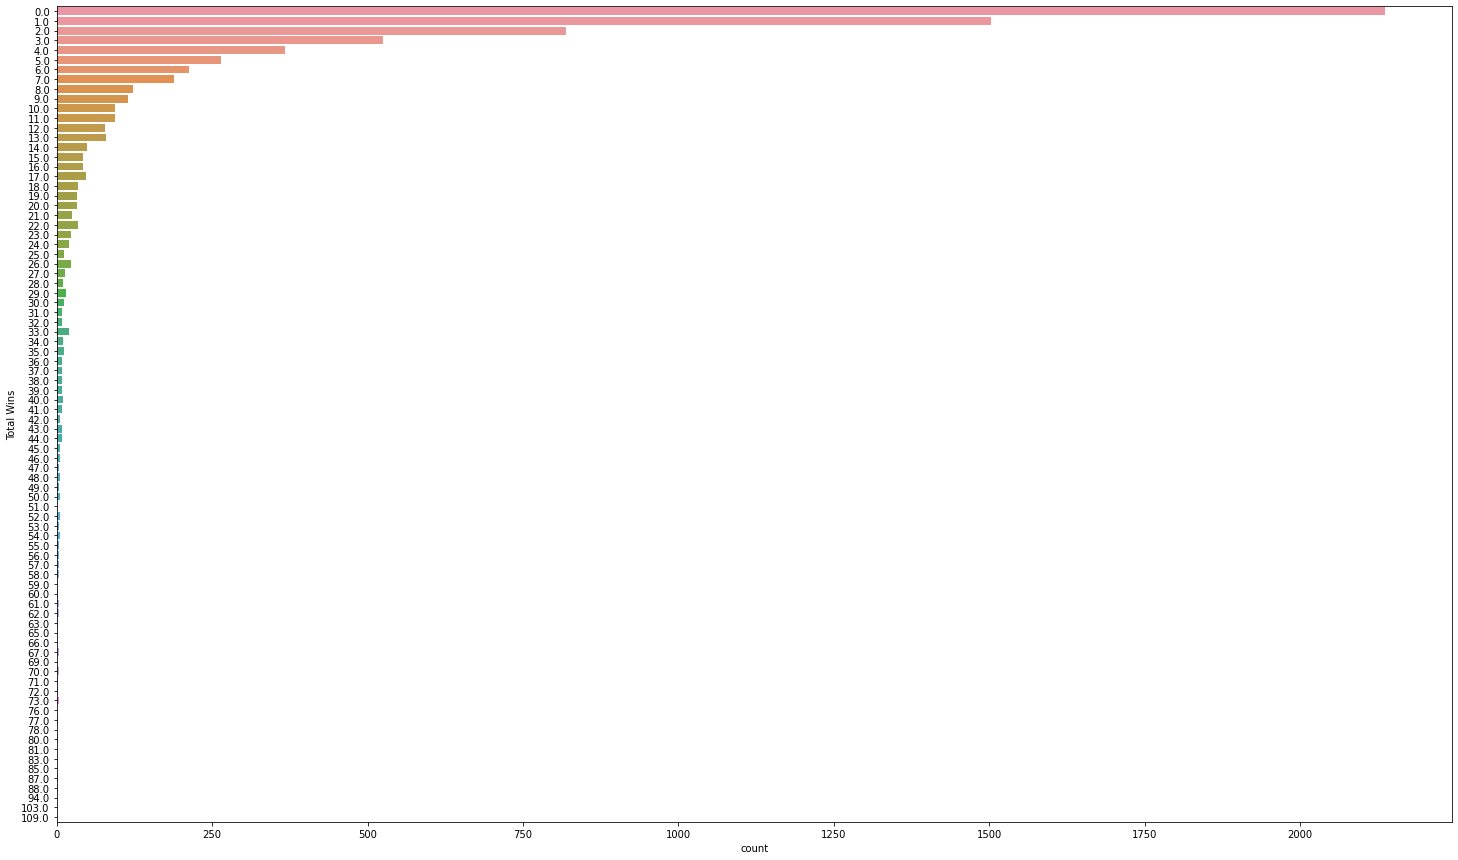

In [24]:
plt.figure().set_size_inches(25, 15)
sns.countplot(y = "Total Wins", data = thing)
plt.show()

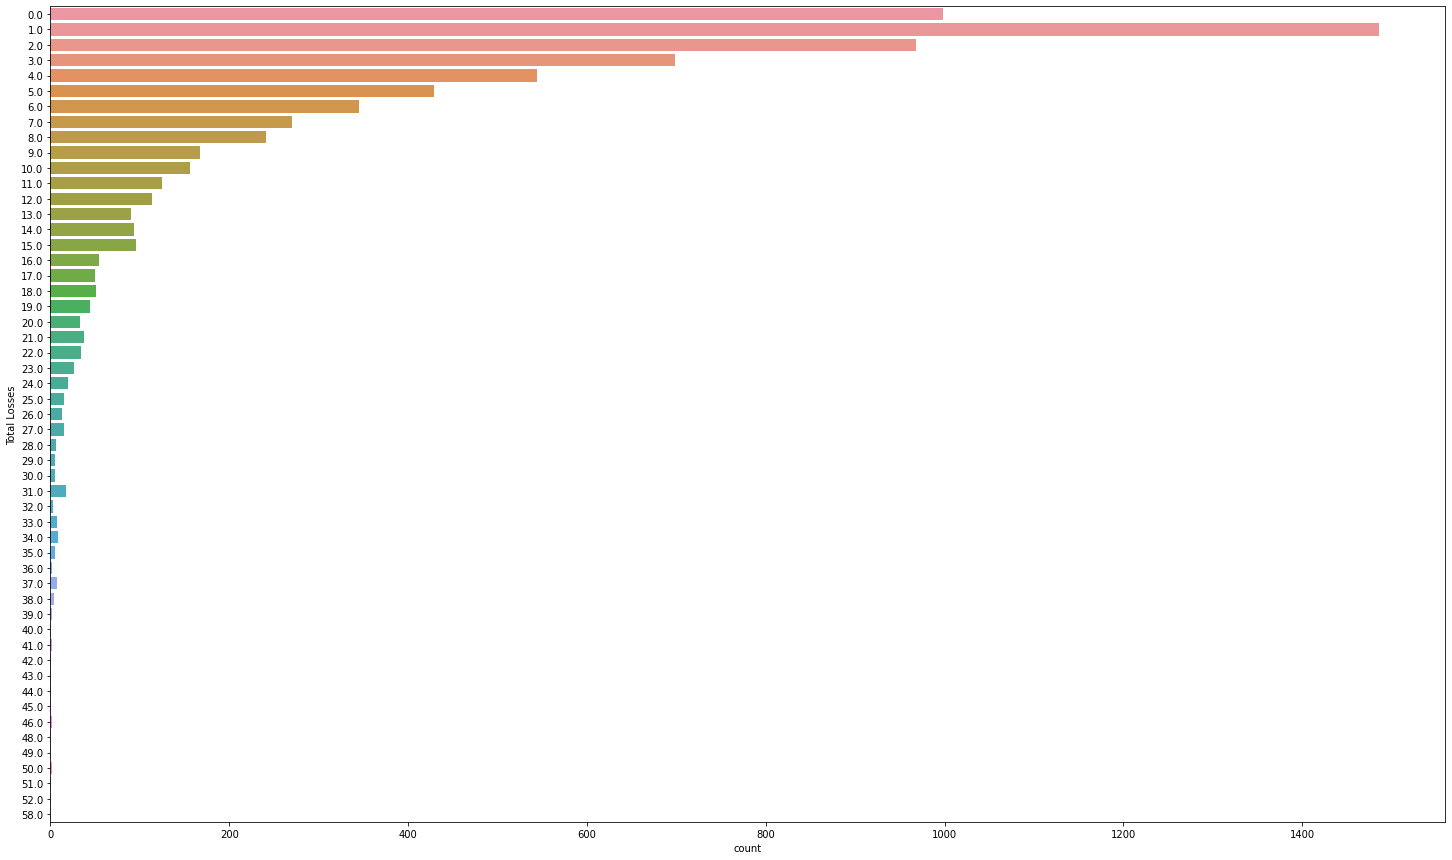

In [25]:
plt.figure().set_size_inches(25, 15)
sns.countplot(y = "Total Losses", data = thing)
plt.show()